<a href="https://colab.research.google.com/github/NastyaShanova/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re 
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [2]:
url = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B9_%D0%9A%D0%B0%D0%B7%D0%B0%D1%85%D1%81%D1%82%D0%B0%D0%BD%D0%B0#cite_ref-26'
id_table = 1
df_power = pd.read_html(url, header = 0, index_col = 0)[id_table]
df_power = df_power.drop(['Источники'], axis='columns')
df_power = df_power.drop(['Собственник'], axis='columns')
df_power['Топливо'] = df_power['Топливо'].replace(np.nan, '')
df_power = df_power.rename(columns={'Установленная мощность, МВт[36]': 'Мощность, МВт'})

df_date = df_power['Мощность, МВт'].str.split('[', expand = True) 
df_date = df_date.drop([1], axis='columns')
df_power['Мощность, МВт'] = df_date

df_date = df_power['Область'].str.split('[', expand = True) 
df_date = df_date.drop([1], axis='columns')
df_power['Область'] = df_date

In [3]:
df_power_2 = df_power.copy()

df_power_2['Выработк за сут, МВт'] = df_power_2['Мощность, МВт'] 
df_power_2['Выработк за сут, МВт'] = [int(df_power_2['Выработк за сут, МВт'][i]) * 24 for i in range(1, len(df_power_2['Выработк за сут, МВт'])+1)]
df_power_2['Мощность, МВт'] = [int(df_power_2['Мощность, МВт'][i]) for i in range(1, len(df_power_2['Мощность, МВт'])+1)]

df_power_2 = df_power_2.sort_values(['Область']) 
df_power_2.reset_index(drop=True, inplace=True)

#df_power_2 = df_power_2.sort_values(['Выработк за сут, МВт']) 


In [4]:
df_power_2['Тип'] = np.where(df_power_2['Название'].str.find('ГТЭС') >= 0, 'ГТЭС',\
                             np.where(df_power_2['Название'].str.find('ТЭЦ') >= 0, 'ТЭЦ',\
                             np.where(df_power_2['Название'].str.find('ГРЭС') >= 0, 'ГРЭС',\
                             np.where(df_power_2['Название'].str.find('ТЭС') >= 0, 'ТЭС',\
                             np.where(df_power_2['Название'].str.find('ГТУ') >= 0, 'ГТУ', '?')))))

# Выбрать электростанции с мощностью выше 10000 МВт и ГРЭС
print(df_power_2[(df_power_2['Выработк за сут, МВт'] > 10000.) & (df_power_2['Тип'] == 'ГРЭС')])


df_power_2

                            Название Топливо  Мощность, МВт  \
22                   Жамбылская ГРЭС   мазут           1230   
32             Карагандинская ГРЭС-2   уголь            743   
47  Аксуская ГРЭС (Ермаковская ГРЭС)   уголь           2450   
48              Экибастузская ГРЭС-2   уголь           1000   
49              Экибастузская ГРЭС-1   уголь           3500   

                   Область  Выработк за сут, МВт   Тип  
22      Жамбылская область                 29520  ГРЭС  
32  Карагандинская область                 17832  ГРЭС  
47    Павлодарская область                 58800  ГРЭС  
48    Павлодарская область                 24000  ГРЭС  
49    Павлодарская область                 84000  ГРЭС  


,Название,Топливо,"Мощность, МВт",Область,"Выработк за сут, МВт",Тип
0,Степногорская ТЭЦ,,180,Акмолинская область,4320,ТЭЦ
1,Астанинская ТЭЦ-1,,22,Акмолинская область,528,ТЭЦ
2,Астанинская ТЭЦ-2,,360,Акмолинская область,8640,ТЭЦ
3,Актюбинская ТЭЦ,,88,Актюбинская область,2112,ТЭЦ
4,ТЭЦ АЗФ (ГТЭС Актурбо),газ,135,Актюбинская область,3240,ГТЭС
5,ГТЭС-45,газ,34,Актюбинская область,816,ГТЭС
6,Жанажолская ГТЭС,,120,Актюбинская область,2880,ГТЭС
7,Алматинская ТЭЦ-3,уголь,173,Алматинская область,4152,ТЭЦ
8,Текелийская ТЭЦ-2,,24,Алматинская область,576,ТЭЦ
9,Алматинская ТЭЦ-2,уголь,510,Алматинская область,12240,ТЭЦ


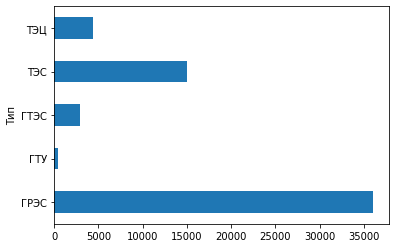

In [5]:
# Построение гистограммы
df_power_2.groupby(['Тип'])['Выработк за сут, МВт'].mean().plot(kind = 'barh')
print()

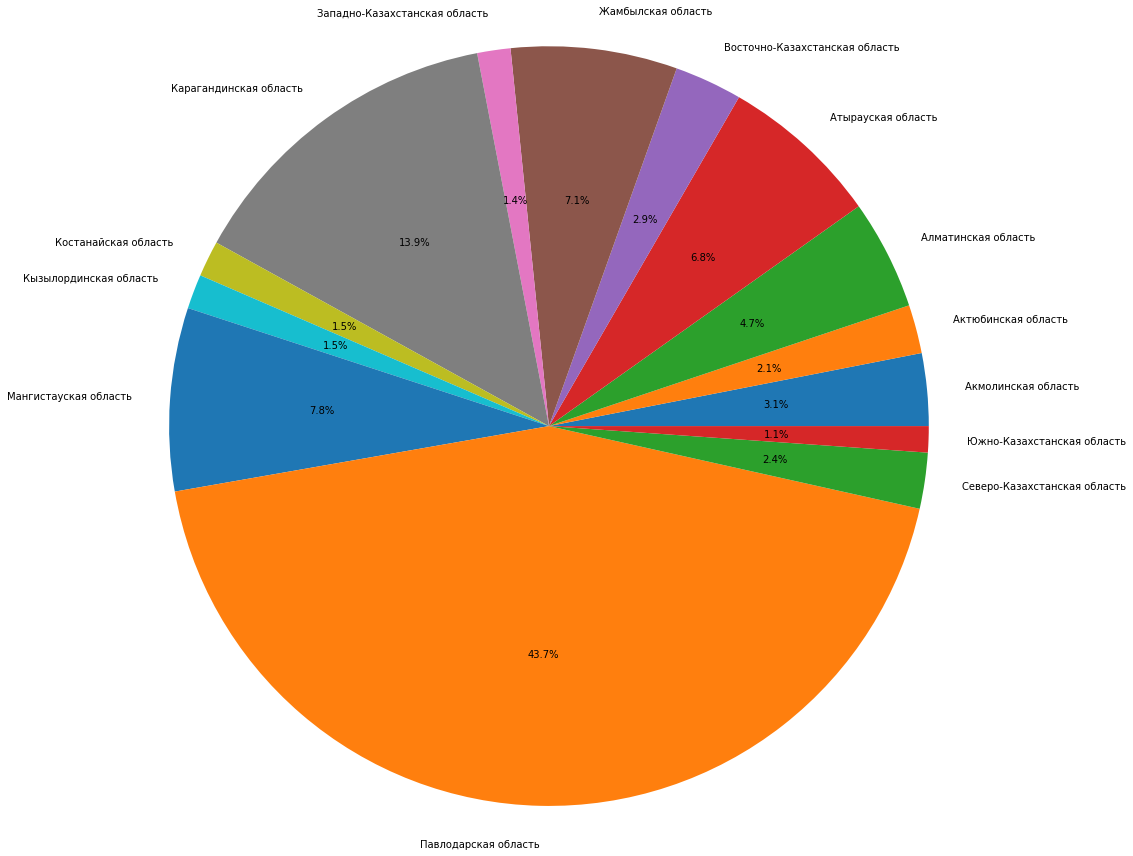

In [6]:
# Круговая диаграмма 
df_oblast = df_power_2.groupby('Область').sum()
labels = df_oblast.index
fig1, ax1 = plt.subplots(figsize = (15, 15))
ax1.pie(df_oblast['Мощность, МВт'], labels = df_oblast.index, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [7]:
df_type = df_power_2.groupby('Тип').sum()
df_type['Тип'] = df_type.index 
df_type = df_type.drop(['Выработк за сут, МВт'], axis='columns')
df_type.reset_index(drop=True, inplace=True)

df_type

,"Мощность, МВт",Тип
0,9007,ГРЭС
1,19,ГТУ
2,1616,ГТЭС
3,625,ТЭС
4,6967,ТЭЦ


In [8]:
from bokeh.models.annotations import Title

output_notebook()

p = figure(plot_width=800, plot_height=400)
p.vbar(x=[i for i in range(1, len(df_type['Мощность, МВт'])+1)], width=0.5, bottom=0, top=df_type['Мощность, МВт'], color="firebrick")
p.xaxis.axis_label = 'Тип'
p.yaxis.axis_label = 'Мощность, МВт'
t = Title()
t.text = 'Тип электростанций - Мощность'
p.title = t
p.xaxis.major_label_overrides = {1: 'ГРЭС', 2: 'ГТУ', 3: 'ГТЭС', 4: 'ТЭС', 5: 'ТЭЦ'}
show(p)